# Greyscale Image Dimensionality Reduction

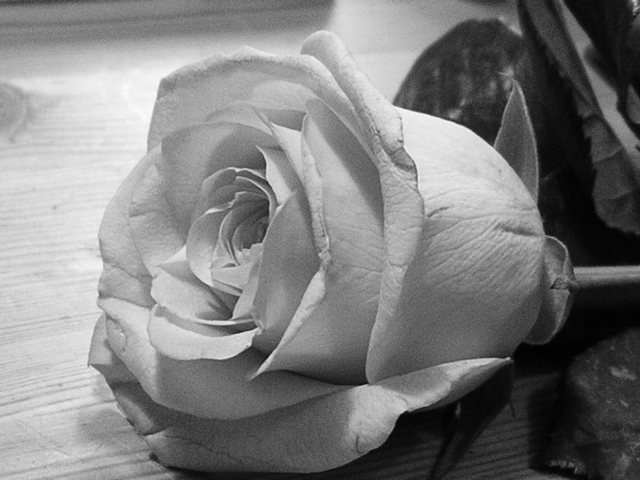

In [1]:
import numpy as np
from PIL import Image
from IPython.display import display

im = Image.open('grayscale_rose.jpg')
display(im)

In [2]:
# Convert to numpy array
array = np.array(im)
print(array.shape)
array

(480, 640)


array([[ 94, 101,  95, ..., 117,  88,  68],
       [ 84,  89,  84, ..., 112, 101,  75],
       [ 77,  73,  70, ..., 108, 103,  73],
       ...,
       [187, 185, 190, ...,  48,  55,  49],
       [192, 190, 188, ...,  56,  65,  50],
       [196, 194, 193, ...,  53,  52,  47]], dtype=uint8)

(640,)
True


<ipython-input-3-fc6ae955c5bb>:27: ComplexWarning: Casting complex values to real discards the imaginary part
  reconst = reconst.astype(np.uint8) # projection (480 x 640)
<ipython-input-3-fc6ae955c5bb>:29: ComplexWarning: Casting complex values to real discards the imaginary part
  code = (np.dot(np.linalg.inv(B.T @ B) @ B.T, Xbar.T).T).astype(np.uint8) # code (480 x 40)


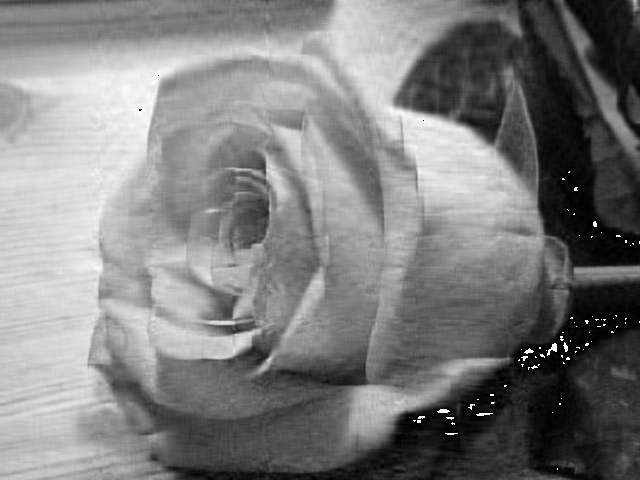

In [3]:
# Manual PCA, trying to reduce image dimensions to 480 x 40

# Normalize data and get its covariance matrix (640 x 640)
mu = np.mean(array, axis = 0)
std_dev = np.var(array, axis = 0)
Xbar = (array - mu)/std_dev
S = (Xbar.T @ Xbar)/np.ndim(Xbar)
print(mu.shape)
# print(S.shape)

# Get and sort eigenvalues and eigenvectors in descending order. 
# Check they should have norm one.
eigvals, eigvecs = np.linalg.eig(S)
sort_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sort_indices]
eigvecs = eigvecs[:, sort_indices]
print(sum([round(np.linalg.norm(vector)) == 1 for vector in eigvecs]) == 640)

# Find basis of principle subspace by 480 largest eigenvectors. 
# Use this to calculate the projection matrix onto the principle subspace.
principal_vals, principal_components = eigvals[:40], eigvecs[:, :40]
B = principal_components
P = B @ np.linalg.inv(B.T @ B) @ B.T # (640 x 640)

# Project the new image and unnormalize it 
reconst = (np.dot(P, Xbar.T).T * std_dev + mu)
reconst = reconst.astype(np.uint8) # projection (480 x 640)

code = (np.dot(np.linalg.inv(B.T @ B) @ B.T, Xbar.T).T).astype(np.uint8) # code (480 x 40)

# display(Image.fromarray(code))
display(Image.fromarray(reconst))

True


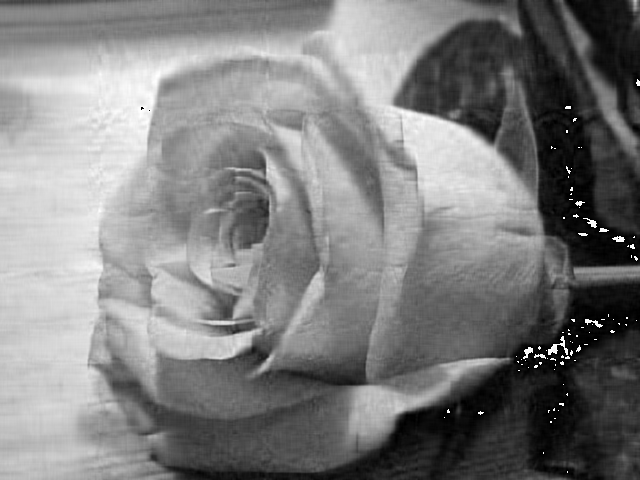

In [5]:
# Try with array transposed now.
mu = np.mean(array.T, axis = 0)
std_dev = np.var(array.T, axis = 0)
Xbar = (array.T - mu)/std_dev
S = (Xbar.T @ Xbar)/np.ndim(Xbar)
# print(S.shape)

# Get and sort eigenvalues and eigenvectors in descending order. 
# Check they should have norm one.
eigvals, eigvecs = np.linalg.eig(S)
sort_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sort_indices]
eigvecs = eigvecs[:, sort_indices]
print(sum([round(np.linalg.norm(vector)) == 1 for vector in eigvecs]) == 480)

# Find basis of principle subspace by 480 largest eigenvectors. 
# Use this to calculate the projection matrix onto the principle subspace.
principal_vals, principal_components = eigvals[:40], eigvecs[:, :40]
B = principal_components
P = B @ np.linalg.inv(B.T @ B) @ B.T # (480 x 480)
# print(P.shape)

# Project the new image and unnormalize it 
reconst = np.dot(P, Xbar.T).T * std_dev + mu
reconst = reconst.astype(np.uint8).T # projection (640 x 480)

code = (np.dot(np.linalg.inv(B.T @ B) @ B.T, Xbar.T).T).astype(np.uint8) # code (640 x 40)
# print(code.shape)

display(Image.fromarray(reconst))